
# Import

In [1]:
import pandas as pd
import numpy as np
import pathlib
from tqdm.notebook import tqdm
import librosa
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
dataset_folder = pathlib.Path("RavdessAudioOnly")  # change it with your file location

In [3]:
file_list = list(dataset_folder.iterdir())
for i, path in enumerate(file_list):
    if path.suffix != ".wav":
        file_list.pop(i)
file_list = sorted(file_list)
file_list

[PosixPath('RavdessAudioOnly/03-01-01-01-01-01-01.wav'),
 PosixPath('RavdessAudioOnly/03-01-01-01-01-01-02.wav'),
 PosixPath('RavdessAudioOnly/03-01-01-01-01-01-03.wav'),
 PosixPath('RavdessAudioOnly/03-01-01-01-01-01-04.wav'),
 PosixPath('RavdessAudioOnly/03-01-01-01-01-01-05.wav'),
 PosixPath('RavdessAudioOnly/03-01-01-01-01-01-06.wav'),
 PosixPath('RavdessAudioOnly/03-01-01-01-01-01-07.wav'),
 PosixPath('RavdessAudioOnly/03-01-01-01-01-01-08.wav'),
 PosixPath('RavdessAudioOnly/03-01-01-01-01-01-09.wav'),
 PosixPath('RavdessAudioOnly/03-01-01-01-01-01-10.wav'),
 PosixPath('RavdessAudioOnly/03-01-01-01-01-01-11.wav'),
 PosixPath('RavdessAudioOnly/03-01-01-01-01-01-12.wav'),
 PosixPath('RavdessAudioOnly/03-01-01-01-01-01-13.wav'),
 PosixPath('RavdessAudioOnly/03-01-01-01-01-01-14.wav'),
 PosixPath('RavdessAudioOnly/03-01-01-01-01-01-15.wav'),
 PosixPath('RavdessAudioOnly/03-01-01-01-01-01-16.wav'),
 PosixPath('RavdessAudioOnly/03-01-01-01-01-01-17.wav'),
 PosixPath('RavdessAudioOnly/03

In [4]:
array = list()
for path in tqdm(file_list):
    librosa_audio_segment, sr = librosa.load(path, sr=None)
    array.append([librosa_audio_segment])

  0%|          | 0/2462 [00:00<?, ?it/s]

In [5]:
b = ak.ArrayBuilder()
for path in tqdm(file_list):
    librosa_audio_segment, sr = librosa.load(path, sr=None)
    b.begin_list()
    b.begin_list()
    for value in librosa_audio_segment:
        b.real(value)
    b.end_list() 
    b.end_list() 
array = b.snapshot()
#5-10 minuti secondo Spinnato

  0%|          | 0/2462 [00:00<?, ?it/s]

In [6]:
CATEGORICAL_FEATURES_NAMES = {
    "modality": {"01": "full-AV", "02": "video-only", "03": "audio-only"}, 
    "vocal_channel": {"01": "speech", "02": "song"},
    "emotion": {"01" : "neutral", "02" : "calm", "03" : "happy", "04" : "sad", "05" : "angry", "06" : "fearful", "07" : "disgust", "08" : "surprised"},
    "emotional_intensity": {"01" : "normal", "02" : "strong"},
    "statement": {"01" : "Kids are talking by the door", "02" : "Dogs are sitting by the door"},
    "repetition": {"01" : "1st", "02" : "2nd"},
    "actor": {int(i): int(i) for i in range(1, 25)}
}

In [7]:
CATEGORICAL_FEATURES_NAMES

{'modality': {'01': 'full-AV', '02': 'video-only', '03': 'audio-only'},
 'vocal_channel': {'01': 'speech', '02': 'song'},
 'emotion': {'01': 'neutral',
  '02': 'calm',
  '03': 'happy',
  '04': 'sad',
  '05': 'angry',
  '06': 'fearful',
  '07': 'disgust',
  '08': 'surprised'},
 'emotional_intensity': {'01': 'normal', '02': 'strong'},
 'statement': {'01': 'Kids are talking by the door',
  '02': 'Dogs are sitting by the door'},
 'repetition': {'01': '1st', '02': '2nd'},
 'actor': {1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24}}

In [8]:
df = list()
file_names = list()
for path in file_list:
    stem = path.stem.split("-")
    file_names.append(path.name)
    df.append(stem)
df = pd.DataFrame(df)
df.columns = list(CATEGORICAL_FEATURES_NAMES.keys())

for column in df.columns:
    df = df.replace(CATEGORICAL_FEATURES_NAMES)

#df["sex"] = ["F" if i % 2 == 0 else "M" for i in df["actor"].astype(int)]
df["sex"] = "F"
df["filename"] = file_names

In [9]:
for i in range(0, len(df)):
    if i % 2 == 0:
        df["sex"][i] = "M"

In [10]:
df.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,01,M,03-01-01-01-01-01-01.wav
1,audio-only,speech,neutral,normal,Kids are talking by the door,1st,02,F,03-01-01-01-01-01-02.wav
2,audio-only,speech,neutral,normal,Kids are talking by the door,1st,03,M,03-01-01-01-01-01-03.wav
3,audio-only,speech,neutral,normal,Kids are talking by the door,1st,04,F,03-01-01-01-01-01-04.wav
4,audio-only,speech,neutral,normal,Kids are talking by the door,1st,05,M,03-01-01-01-01-01-05.wav


In [11]:
df["actor"] = df["actor"].replace(['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])

In [12]:
df.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav
1,audio-only,speech,neutral,normal,Kids are talking by the door,1st,2,F,03-01-01-01-01-01-02.wav
2,audio-only,speech,neutral,normal,Kids are talking by the door,1st,3,M,03-01-01-01-01-01-03.wav
3,audio-only,speech,neutral,normal,Kids are talking by the door,1st,4,F,03-01-01-01-01-01-04.wav
4,audio-only,speech,neutral,normal,Kids are talking by the door,1st,5,M,03-01-01-01-01-01-05.wav


In [13]:
df.dtypes

modality               object
vocal_channel          object
emotion                object
emotional_intensity    object
statement              object
repetition             object
actor                  object
sex                    object
filename               object
dtype: object

In [14]:
df_sorted_actor = df.sort_values(by=["actor", "filename"])
idxs_sorted = list(df_sorted_actor.index)

In [15]:
df_sorted_actor

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav
24,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav
48,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,03-01-01-01-02-01-01.wav
72,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,03-01-01-01-02-02-01.wav
96,audio-only,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav
...,...,...,...,...,...,...,...,...,...
599,audio-only,speech,sad,strong,Kids are talking by the door,1st,21(1),F,03-01-04-02-01-01-21(1).wav
1152,audio-only,speech,disgust,normal,Dogs are sitting by the door,2nd,21(1),M,03-01-07-01-02-02-21(1).wav
1201,audio-only,speech,disgust,strong,Kids are talking by the door,2nd,21(1),F,03-01-07-02-01-02-21(1).wav
1465,audio-only,song,neutral,normal,Kids are talking by the door,1st,21(1),F,03-02-01-01-01-01-21(1).wav


In [16]:
for i in range(0, len(df_sorted_actor)):
    if type(df_sorted_actor["actor"][i]) == str:
        print(df_sorted_actor["actor"][i], i)

19(1) 354
19(1) 403
21(1) 550
21(1) 599
21(1) 1152
21(1) 1201
21(1) 1465
21(1) 1581
19(1) 2293
19(1) 2432


In [17]:
df_sorted_actor["actor"][354] = 19
df_sorted_actor["actor"][403] = 19
df_sorted_actor["actor"][2293] = 19
df_sorted_actor["actor"][2432] = 19
df_sorted_actor["actor"][550] = 21
df_sorted_actor["actor"][599] = 21
df_sorted_actor["actor"][1152] = 21
df_sorted_actor["actor"][1201] = 21
df_sorted_actor["actor"][1465] = 21
df_sorted_actor["actor"][1581] = 21

In [18]:
idx_train = list(df_sorted_actor[df_sorted_actor.actor.astype(int) < 19].index)
idx_test = list(df_sorted_actor[df_sorted_actor.actor.astype(int) >= 19].index)

In [19]:
X_train = array[idx_train]
X_test = array[idx_test]
Y_train = df_sorted_actor[df_sorted_actor.actor.astype(int) < 19]
Y_test = df_sorted_actor[df_sorted_actor.actor.astype(int) >= 19]

## online

In [20]:
!pip install git+https://github.com/fspinna/datatime.git

  Cloning https://github.com/fspinna/datatime.git to /private/var/folders/5p/ssqpg4td2mn8_4_dm85f8n5m0000gn/T/pip-req-build-ntg8pw80
  Running command git clone -q https://github.com/fspinna/datatime.git /private/var/folders/5p/ssqpg4td2mn8_4_dm85f8n5m0000gn/T/pip-req-build-ntg8pw80
  Resolved https://github.com/fspinna/datatime.git to commit e007db5d7133a8b3abe74f249fd4ebcfb67e8cf6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [21]:
from datatime import load_dataset

In [22]:
%%time
d = load_dataset("RavdessAudioOnly")
print(d)

Dataset Name: RavdessAudioOnly
Task: multioutput
X_train: (1828, 1, (140941, 142542, 144144, 145745, 145746, 147347, 147348, 148948, 148949, 150550, 150551, 152152, 153753, 153754, 155355, 155356, 156956, 156957, 158558, 158559, 160160, 161761, 161762, 163363, 163364, 164964, 164965, 166566, 166567, 168168, 169769, 169770, 171371, 171372, 172972, 172973, 174574, 174575, 176176, 177777, 177778, 179379, 179380, 180980, 180981, 182582, 182583, 184184, 185785, 185786, 187387, 187388, 188988, 188989, 190590, 190591, 192192, 193793, 193794, 195395, 195396, 196996, 196997, 198598, 198599, 200200, 201801, 201802, 203403, 203404, 205004, 205005, 206606, 206607, 208208, 209809, 209810, 211411, 211412, 213012, 213013, 214614, 214615, 216216, 217817, 217818, 219419, 219420, 221020, 221021, 222622, 222623, 224224, 225825, 225826, 227427, 227428, 229028, 229029, 230630, 230631, 232232, 233833, 233834, 235435, 235436, 237036, 237037, 238638, 238639, 240240, 241841, 241842, 243443, 243444, 245045, 246

In [23]:
X_train, Y_train, X_test, Y_test = d()

In [24]:
Y_train

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,03-01-01-01-02-01-01.wav
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,03-01-01-01-02-02-01.wav
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav
...,...,...,...,...,...,...,...,...,...
1823,audio-only,speech,surprised,normal,Dogs are sitting by the door,2nd,18,F,03-01-08-01-02-02-18.wav
1824,audio-only,speech,surprised,strong,Kids are talking by the door,1st,18,F,03-01-08-02-01-01-18.wav
1825,audio-only,speech,surprised,strong,Kids are talking by the door,2nd,18,F,03-01-08-02-01-02-18.wav
1826,audio-only,speech,surprised,strong,Dogs are sitting by the door,1st,18,F,03-01-08-02-02-01-18.wav


In [25]:
#import datatime
#print(datatime.__file__)

/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/datatime/__init__.py


In [30]:
Y_train.to_csv("RavdessAudioOnline__Y_train.csv", index=False)
Y_test.to_csv("RavdessAudioOnlineNumpy__Y_test.csv", index=False)

In [36]:
len(X_train), len(Y_train)

(1828, 1828)

In [37]:
len(X_test), len(Y_test)

(624, 624)

In [48]:
X_test[0]

<Array [[0, 0, 0, ..., -6.1e-05, -6.1e-05, -6.1e-05]] type='1 * var * float64'>

AttributeError: no field named 'shape'

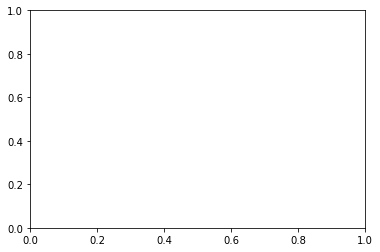

In [50]:
ts = X_test[0][0]
plt.plot(ts)
plt.show()